***LAB 3***\
***Maciej Górnik***\
***ISZ EAIiIB***\
***402325***

In [41]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Modeling prior predictive distribution

In [42]:
ex1 = CmdStanModel(stan_file='/home/lab3/lab3_code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [43]:
samples = ex1.sample( fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


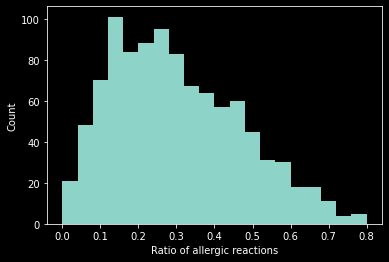

In [44]:
df = samples.draws_pd()

ratios = df['y'] / df['N']
plt.hist(ratios, bins=20)
plt.xlabel('Ratio of allergic reactions')
plt.ylabel('Count')
plt.show()

In [45]:
np.mean(ratios)

0.29114

## Excercisee 2 - Modeling posterior and posterior predictive distribution

In [46]:
ex2 = CmdStanModel(stan_file='/home/lab3/lab3_code_2.stan')
N = 50
samples2 = ex2.sample(data={'N': N, 'y': 10}, fixed_param=True)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


<AxesSubplot:title={'center':'x'}>

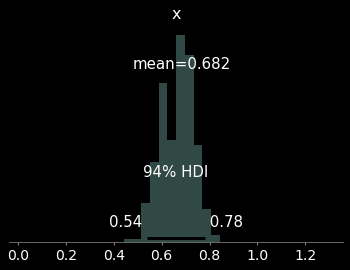

In [47]:
df2 = samples2.draws_pd()
ratio = df2['y_pred']/N
ratio = np.array(ratio)
az.plot_posterior(ratio, kind='hist', round_to=3)

In [48]:
ev = np.mean(ratio)
r_hdi = np.percentile(ratio, [3, 97])

r_mean = np.mean(ratio)

t_prob = 0.05
r_prob = np.mean(ratio < t_prob)

# print the results
print(f"Predicted ratio 94% HDI: {r_hdi}")
print(f"Predicted ratio mean: {r_mean}")
print(f"Probability of ratio < {t_prob}: {r_prob}")

Predicted ratio 94% HDI: [0.56 0.8 ]
Predicted ratio mean: 0.68214
Probability of ratio < 0.05: 0.0
